# Understanding Cluster Analysis with Python

## Introduction

This notebook uses a simple simuation in Python to illustrate the principles of cluster analysis.his notebook performs the following:

- Generates a synthetic data set comprised of a mixture of 7 Nomal distributions.
- Plots the data.
- Computes and plots side by side k-means and hierarchical or agglomerative cluster models for 2, 3, 4, 5, 6, 7 and 8 clusters.

The results of these steps allows you to compare and contrast the results for the two clustering methods. 

## Create the data set

The code in the cell below computes a two-dimensional data set which is the mixure of 7 Normal distributions. Examine the `create_clusts` function and you can see the vectors of `x` and `y` coordinates of the centroids of each cluster along with a vector of the standard deviations of each Normal. 

Execute this code to generate the data set. **Note**, everytime you run this code new realizatons of the 7 Normal distributions will be created. 

In [4]:
def sim_clust_data(ox, oy, n, sd, clust):
    import pandas as pd
    import numpy.random as nr
    
    x = nr.normal(loc = ox, scale = sd, size = n)
    y = nr.normal(loc = oy, scale = sd, size = n)
    cluster = [clust] * n

    out = pd.DataFrame([x, y, cluster]).transpose()
    out.columns = ['x', 'y', 'cluster']    
    return out

def create_clusts(n = 20):
    import pandas as pd
    oxs = [0, 1, 1, 2, 2, 3, 3]
    oys = [0, 1, -1, 2, -2, 1, -1]  
    sds = [.5, .5, .5, .5, .5, 1, .5]
    clust_data = sim_clust_data(oxs[0], oys[0], n, sds[0], 0)
    i = 0
    for i in range(1, 7):
      temp = sim_clust_data(oxs[i], oys[i], n, sds[i], i)
      clust_data = pd.concat([clust_data, temp])
    return clust_data
clusters = create_clusts()

## Plot the data set

The code in the cell below plots the data set. A different color is used to denote each Normal distribution. Run this code and note the overlap in the data samples generated from the Normal distributions.

'Done'

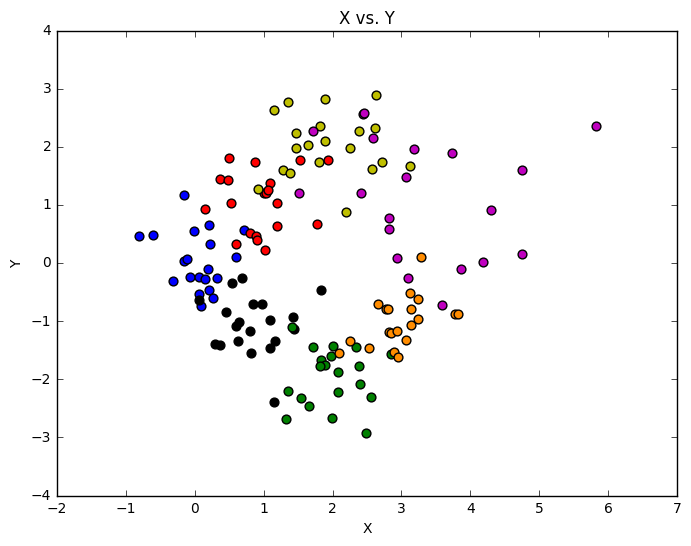

In [5]:
%matplotlib inline
def plot_data(df):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    clusts = df['cluster'].unique()
    cl = ['b',  'r', 'k', 'y', 'g', 'm', 'darkorange', 'hotpink']
    for i, cls in enumerate(clusts):
        temp = df[df['cluster'] == cls]
        temp.plot(kind = 'scatter', x = 'x', y = 'y', s = 40, color = cl[i], ax = ax)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('X vs. Y')
    return 'Done'
plot_data(clusters)

## Compute and plot clusters

With the data set created it is now time to compute and display the clusters. The code in the cell below does the following:

- Loop over the numbers of clusters to be computed and displayed.
  - Compute the hierarchical or agglomerative cluster model for the number of clusters.
  - Compute the k-means model for the number of clusters.
  - Call the plot function to display the result. 

Between two and eight clusters is computed and displayed. Two clusters are the minimum a data set can be divided into. The maximum of eight clusters is one more than the seven Normal distributions used to generate the data set. 

Execute the code and compare the results for the k-means and hierarchical or agglomerative cluster models. Notice that in each case, the k-means and hierarchical models produce different results. Which result is more useful depends on the application. 

'Done'

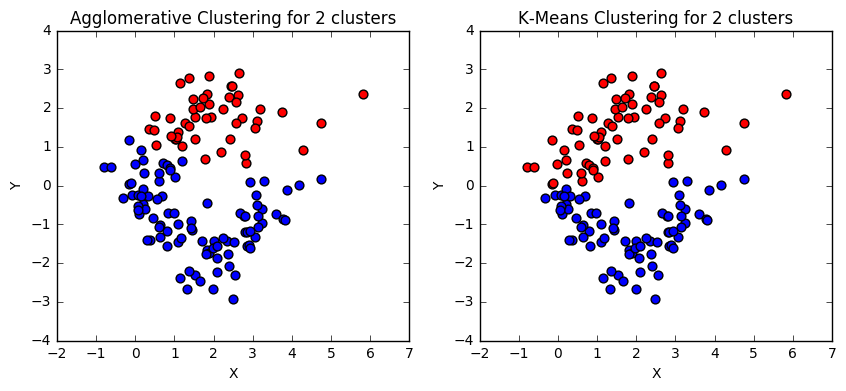

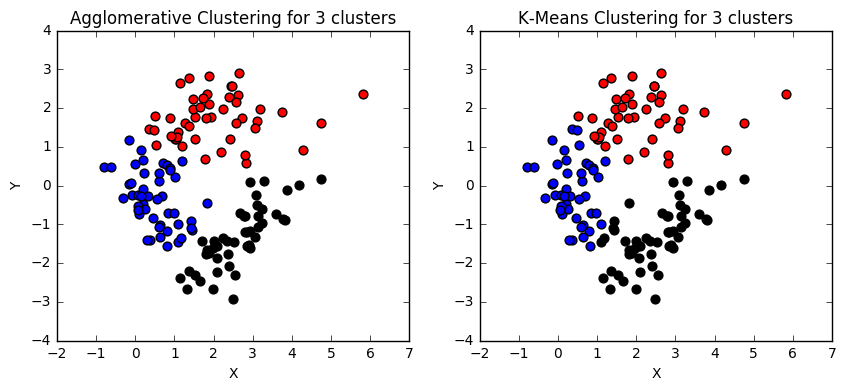

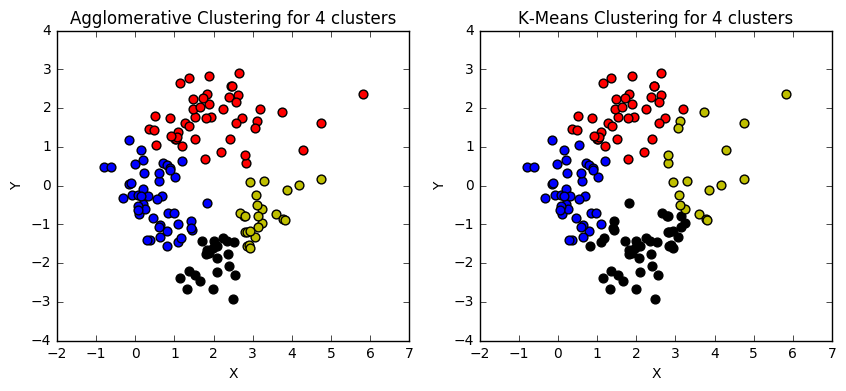

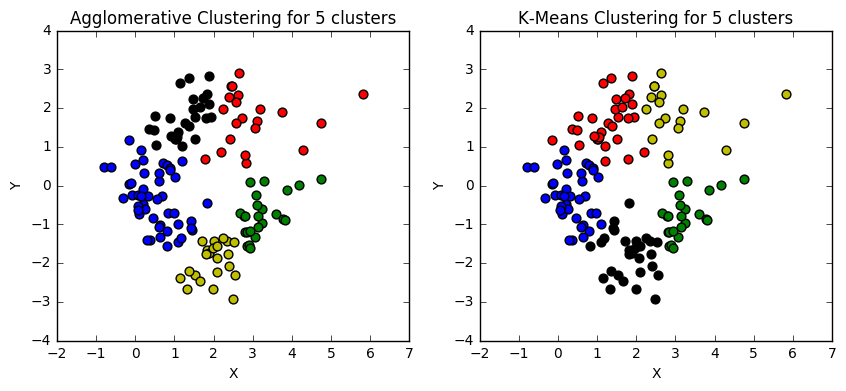

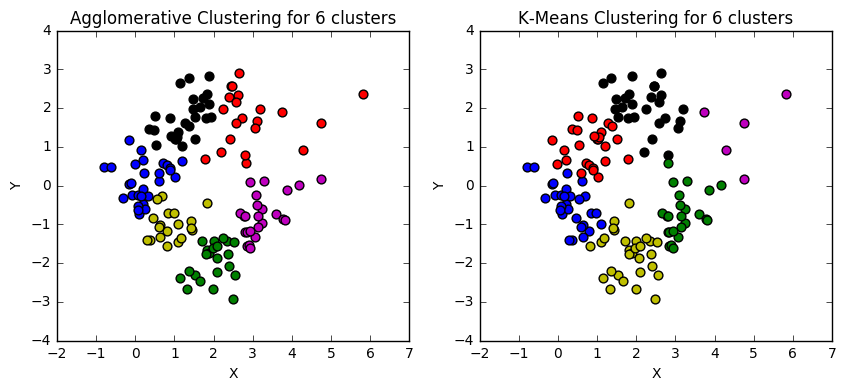

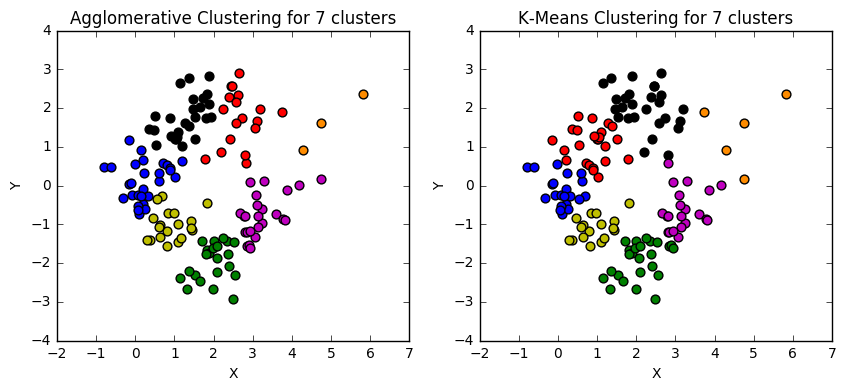

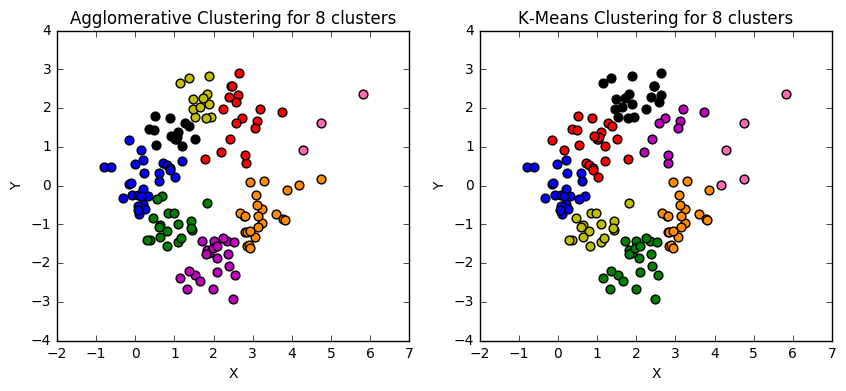

In [7]:
def plot_clusters(df, n_clust):
    import matplotlib.pyplot as plt    
    clusts_a = df['assignment_a'].unique()
    clusts_k = df['assignment_k'].unique()
    cl = ['b',  'r', 'k', 'y', 'g', 'm', 'darkorange', 'hotpink']
    
    fig = plt.figure(figsize=(10, 4))
    fig.clf()
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2) 
    for clu_a, clu_k, col in zip(clusts_a, clusts_k, cl):
        temp = df[df['assignment_a'] == clu_a]
        temp.plot(kind = 'scatter', x = 'x', y = 'y', s = 40, color = col, ax = ax1)
        
        temp = df[df['assignment_k'] == clu_k]
        temp.plot(kind = 'scatter', x = 'x', y = 'y', s = 40, color = col, ax = ax2)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title('Agglomerative Clustering for ' + str(n_clust)  + ' clusters')
     
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('K-Means Clustering for ' + str(n_clust) + ' clusters')
        
    return 'Done'

def demo_clusts(clust_data, n = 20, linkage = 'ward'):
    from sklearn.cluster import AgglomerativeClustering, KMeans

    X = clust_data[['x','y']].as_matrix()
    for i in range(2,9):        
        agg = AgglomerativeClustering(n_clusters = i, linkage = linkage)
        clust_data['assignment_a'] = agg.fit_predict(X)

        km = KMeans(n_clusters = i)
        clust_data['assignment_k'] = km.fit_predict(X)
        plot_clusters(clust_data, i)    
    return 'Done'    
demo_clusts(clusters)